---
format: 
  html:
    toc: true
execute:
  echo: true
---

# Cluster analysis

## Selecting k with the Elbow Method

In [21]:
#| echo: true 
#| code-fold: true
df["lot_sqft"] = (df["lot_sqft"] - df["lot_sqft"].min()) / (df["lot_sqft"].max() - df["lot_sqft"].min())
dfclu = df.loc[:,["beds","baths","baths_full","baths_half","garage","lot_sqft","pricePerSqft","stories","age"]]

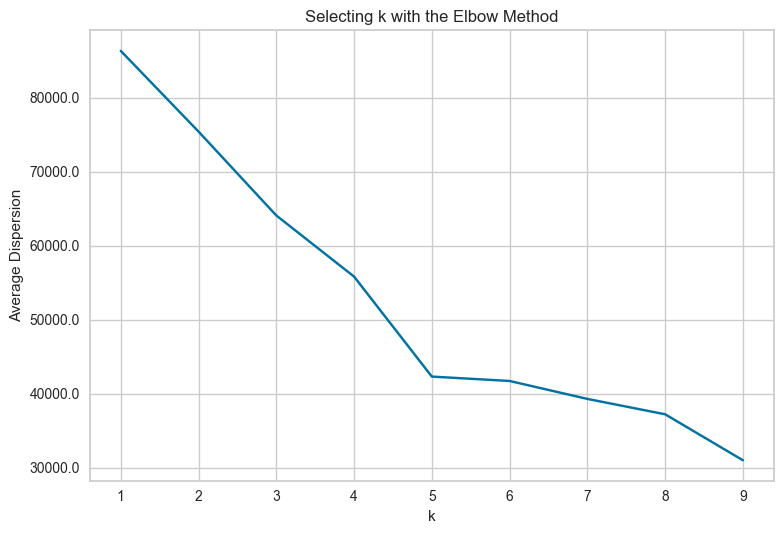

In [ ]:
#| echo: true 
#| code-fold: true
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k,random_state=1)
    kmeans.fit(dfclu)
    meandistortions.append(sum(np.min(cdist(dfclu , kmeans.cluster_centers_, 'euclidean'), axis=1))/df1.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.show()

The optimal number of clusters for the K-means clustering algorithm is selected by the elbow method, k. First, a range of cluster numbers from 1 to 9 is defined, and then for each value of k, the mean aberration after clustering, i.e., the average distance of a sample to its nearest cluster center, is calculated. Finally, the k values are plotted against the mean aberration to aid in the selection of the optimal k value.

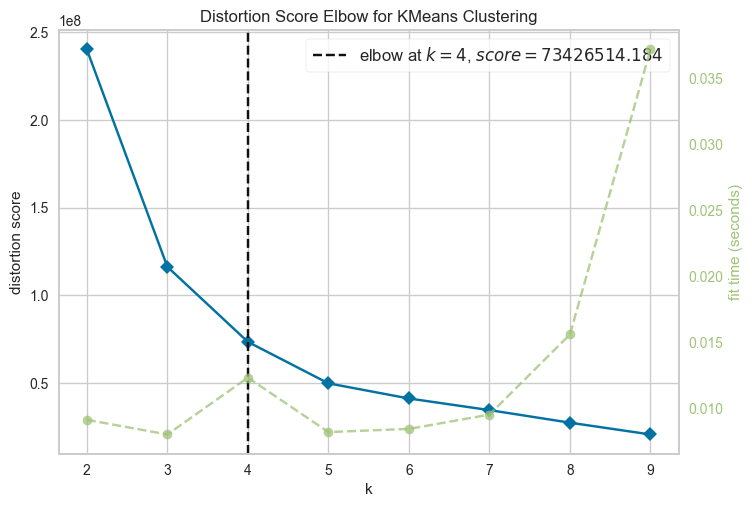

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
#| echo: true 
#| code-fold: true
model = KMeans(random_state=1)  
visualizer = KElbowVisualizer(
    model, 
    k=(2,10),
    timings=True,  # 
    metric="distortion",  # distortion, silhouette,calinski_harabasz
    )
visualizer.fit(dfclu)        
visualizer.show()  

The KMeans clustering model and the KElbowVisualizer visualization tool are used to select the optimal number of clusters, and the KElbowVisualizer helps the user find the “elbow” intuitively by plotting the distortion at different k-values, i.e., the point of k-value where the distortion starts to decrease sharply and becomes slower, and the optimal number of clusters is obtained. values, and get the optimal number of clusters4.

## Kmeans clustering algorithm

In [ ]:
#| echo: true 
#| code-fold: true
from sklearn import metrics
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(dfclu)

KMeans(n_clusters=4, random_state=1)

Based on the best clustering result, mean clustering is performed.

## Evaluation of clustering algorithms

In [26]:
#| echo: true 
#| code-fold: true
pre_y = kmeans.predict(dfclu)
inertias = kmeans.inertia_
y = df['status']
# Adjusted Rand Index
adjusted_rand_s = metrics.adjusted_rand_score(y, pre_y)
# Mutual information
mutual_info_s = metrics.mutual_info_score(y, pre_y)
# Adjusted mutual information
adjusted_mutual_info_s = metrics.adjusted_mutual_info_score(y, pre_y)
# Homogenization score
homogeneity_s = metrics.homogeneity_score(y, pre_y)
# Integrity score
completeness_s = metrics.completeness_score(y, pre_y)
# V-measure score
v_measure_s = metrics.v_measure_score(y, pre_y)
# Average profile factor
silhouette_s = metrics.silhouette_score(dfclu, pre_y, metric='euclidean')
# Calinski and Harabaz scores
calinski_harabaz_s = metrics.calinski_harabasz_score(dfclu, pre_y)
df_metrics = pd.DataFrame([[inertias, adjusted_rand_s,mutual_info_s, adjusted_mutual_info_s, homogeneity_s,completeness_s,
                            v_measure_s, silhouette_s ,calinski_harabaz_s]],
                             columns=['ine','tARI','tMI','tAMI','thomo','tcomp','tv_m','tsilh','tc&h'])
    
df_metrics

,ine,tARI,tMI,tAMI,thomo,tcomp,tv_m,tsilh,tc&h
0,7.342729e+07,-0.052896,0.002992,0.010274,0.013685,0.010176,0.011672,0.721808,11390.754282


The clustering results show the values of several evaluation metrics. These include lower values for the adjusted Rand index, mutual information, adjusted mutual information, etc., and higher values for the adjusted Rand index.